You can follow along and play with this notebook by clicking the badge below

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jasongfleischer/UCSD_COGS118A/blob/master/Notebooks/Lecture_3_Linear_regression.ipynb)

## Linear regression


In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



# some utility functions to create toy data
# data ~ underlying function + gaussian noise

def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size).reshape(-1, 1)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def a_sinusoidal_func(x):
    return np.sin(2 * np.pi * x)

def a_polynomial_func(x):
    return (12. + 6.14*x - 8.4*x*x)

def an_exp_func(x):
    return (1+1*np.exp(0.001*x))

def a_linear_func(x):
    return (1.17 + 3.14*x)

def a_discontinuous_func(x):
    return [ 1. if el>0.5 else 0. for el in x  ]
    
sample_size = 10
sigma = 0.3

#func = a_sinusoidal_func
#func = a_polynomial_func
#func = a_discontinuous_func
func = a_linear_func

# Some toy data generated by a linear function + noise

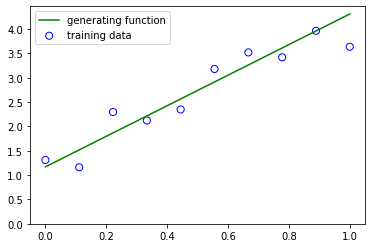

In [2]:
np.random.seed(1234)
x_train, y_train = create_toy_data(func, sample_size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1) #  some x-vals so we can generate true y-vals
y_true = func(x_predict)


plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_predict, y_true, c="g", label="generating function")
plt.ylim(bottom=0.0)
plt.legend()
plt.show()

# Polynomial features:   $ 1 + x + x^2 \ldots$ 

In [3]:
feature = PolynomialFeatures(degree=1)
feature.fit_transform(x_train)

array([[1.        , 0.        ],
       [1.        , 0.11111111],
       [1.        , 0.22222222],
       [1.        , 0.33333333],
       [1.        , 0.44444444],
       [1.        , 0.55555556],
       [1.        , 0.66666667],
       [1.        , 0.77777778],
       [1.        , 0.88888889],
       [1.        , 1.        ]])

In [4]:
feature = PolynomialFeatures(degree=2)
feature.fit_transform(x_train)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.11111111, 0.01234568],
       [1.        , 0.22222222, 0.04938272],
       [1.        , 0.33333333, 0.11111111],
       [1.        , 0.44444444, 0.19753086],
       [1.        , 0.55555556, 0.30864198],
       [1.        , 0.66666667, 0.44444444],
       [1.        , 0.77777778, 0.60493827],
       [1.        , 0.88888889, 0.79012346],
       [1.        , 1.        , 1.        ]])

# Solving for $\mathbf{w}$ using closed-form solution of OLS

![math eqn of psuedoinverse](data/psuedoinverse.png "OLS solution for parameter w")

In [5]:
feature = PolynomialFeatures(degree=1)
X_train = feature.fit_transform(x_train)
X_train

array([[1.        , 0.        ],
       [1.        , 0.11111111],
       [1.        , 0.22222222],
       [1.        , 0.33333333],
       [1.        , 0.44444444],
       [1.        , 0.55555556],
       [1.        , 0.66666667],
       [1.        , 0.77777778],
       [1.        , 0.88888889],
       [1.        , 1.        ]])

In [6]:
w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)
w

array([[1.30036632],
       [2.79305726]])

The true generating function was $1.17 + 3.14*x$.  So not too bad, but not right on.  WHY?

Let's slow down and do that again so we can see the linear algebra in action

In [7]:
#w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y)
X_train.transpose()

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [8]:
#w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y)
X_train.transpose().dot(X_train)

array([[10.        ,  5.        ],
       [ 5.        ,  3.51851852]])

In [9]:
#w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y)
np.linalg.inv(X_train.transpose().dot(X_train))

array([[ 0.34545455, -0.49090909],
       [-0.49090909,  0.98181818]])

In [10]:
#w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y)
np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose())

array([[ 0.34545455,  0.29090909,  0.23636364,  0.18181818,  0.12727273,
         0.07272727,  0.01818182, -0.03636364, -0.09090909, -0.14545455],
       [-0.49090909, -0.38181818, -0.27272727, -0.16363636, -0.05454545,
         0.05454545,  0.16363636,  0.27272727,  0.38181818,  0.49090909]])

In [11]:
np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)

array([[1.30036632],
       [2.79305726]])

# There has to be an easier way!
There is! __scikit-learn__ provides a uniform interface to dozens of machine learning algorithms.  They code up the math, and make the computation of the math effecient/fast.

In [12]:
# if we hadn't built the bias term into feature set True!!!
model = LinearRegression(fit_intercept=False) 
model.fit(X_train, y_train)
model.coef_

array([[1.30036632, 2.79305726]])

# OK, 1 last thing
What if we try to do higher order curve fitting to data which is fundamentally linear?

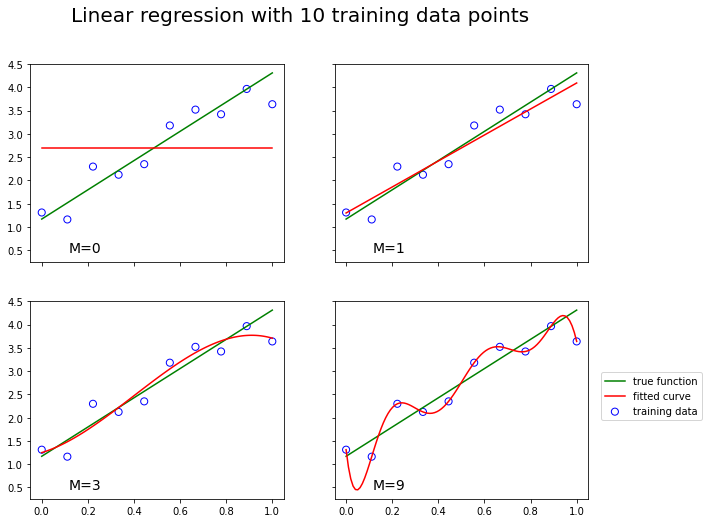

In [13]:
# make a graph with 2x2 subplots
fig, axes = plt.subplots(2,2,sharex=True, sharey=True,figsize=(10, 8))
axs = axes.flatten()

# loop through fitting/plotting 0th, 1st, 3rd, and 9th order polynomials
for i, degree in enumerate([ 0, 1, 3, 9]):
    ax = axs[i]
    feature = PolynomialFeatures(degree)
    X_train = feature.fit_transform(x_train)
    X_predict = feature.fit_transform(x_predict)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_predict)

    ax.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    ax.plot(x_predict, y_true, c="g", label="true function")
    ax.plot(x_predict, y_predict, c="r", label="fitted curve")
    ax.annotate("M={}".format(degree), xy=(.15, .05),  xycoords='axes fraction', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.suptitle('Linear regression with 10 training data points',fontsize=20)
plt.show()